In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics.pairwise import haversine_distances
import functions as f

# Always make it pretty. Always.
plt.style.use('ggplot')

In [140]:
df1 = pd.read_csv("data/accidents_2005_to_2007.csv")
df2 = pd.read_csv("data/accidents_2009_to_2011.csv")
df3 = pd.read_csv("data/accidents_2012_to_2014.csv")
traffic = pd.read_csv("data/ukTrafficAADF.csv")

# df12 = pd.concat([df1,df2])
df = pd.concat([df1, df2, df3])

df = df.drop_duplicates(subset=['Accident_Index','Date','LSOA_of_Accident_Location','Time','Longitude','Latitude'], keep='first')

df = df[df.Speed_limit !=15]

df1 = df1.dropna(subset=['Longitude'])
df = df.dropna(subset=['Longitude'])


In [22]:
df4 = pd.read_csv("data/Accidents0515.csv")
df5 = pd.read_csv("data/Casualties0514.csv")
df6 = pd.read_csv("data/Vehicles0514.csv")

In [ ]:
df4 = df4[~(df4.Accident_Index.str.startswith('2015'))]

In [ ]:
df4 = df4.drop_duplicates(subset=['Accident_Index','Date','LSOA_of_Accident_Location','Time','Longitude','Latitude'], keep='first')
df4 = df4[df4.Speed_limit != 15]
df4.Accident_Index.count()

In [ ]:
traffic.columns

In [ ]:
df.head()

In [ ]:
del df['Police_Force']
del df['Local_Authority_(Highway)']
del df['Local_Authority_(District)']
del df['Pedestrian_Crossing-Human_Control']
del df['Pedestrian_Crossing-Physical_Facilities']
del df['Did_Police_Officer_Attend_Scene_of_Accident']

In [ ]:
df.groupby(by='Year')['Number_of_Casualties'].sum()

In [ ]:
severity_totals = df.groupby('Accident_Severity').size().values
#total is 1,469,963 number of accidents 1469963
severity_mus = severity_totals / severity_totals.sum()
severity_mus

In [ ]:
# mu1 = 19041 / 1469963
# mu2 = 198914 / 1469963
# mu3 = 1252008 / 1469963

In [ ]:
df.groupby(by='Year')['Number_of_Casualties'].sum()

In [ ]:
df.groupby('Year').size()
# Year
# 2005    198722
# 2006    189157
# 2007    182114
# 2009    163550
# 2010    154411
# 2011    151466
# 2012    145569
# 2013    138657
# 2014    146317
# dtype: int64

# Year
# 2005    198727
# 2006    189160
# 2007    182114
# 2009    163553
# 2010    154413
# 2011    151467
# 2012    145569
# 2013    138658
# 2014    146319
# dtype: int64

In [ ]:
df.describe()

In [ ]:
df.Weather_Conditions.value_counts()

In [ ]:
df.Accident_Severity.value_counts()

In [ ]:
df.groupby(['Accident_Severity','Speed_limit']).sum()
severity_speed_limit = np.reshape(df.groupby(['Accident_Severity','Speed_limit']).size().values,(3,7))

severity_speed_limit[0]=severity_speed_limit[0]/severity_speed_limit[0].sum()
type(severity_speed_limit[0][0])

# severity_by_speed = ([(severity_speed_limit[0][:]/severity_speed_limit[0].sum()),
#                         (severity_speed_limit[1][:]/severity_speed_limit[1].sum()),
#                         (severity_speed_limit[2][:]/severity_speed_limit[2].sum())])
# severity_by_speed

In [ ]:
actuals_severity_slimits = np.transpose(np.reshape(df.groupby(['Accident_Severity','Speed_limit']).count()['Accident_Index'].values,(3,7)))
actuals_severity_slimits

In [ ]:
sums2 = df.groupby(['Accident_Severity','Speed_limit']).count().groupby('Accident_Severity').sum()['Accident_Index']
severity_sums = df.groupby(['Accident_Severity','Speed_limit']).count().groupby('Accident_Severity').sum()['Accident_Index'].values
severity_mus = severity_sums/severity_sums.sum()
severity_mus

In [ ]:
sums = df.groupby(['Speed_limit']).count()['Accident_Index']
slimit_sums = df.groupby(['Speed_limit']).count()['Accident_Index'].values
slimit_sums

In [ ]:
# slimit10_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][0] = slimit_sums[0] * severity_mus[i]
# slimit20_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][1] = slimit_sums[1] * severity_mus[i]
# slimit30_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][2] = slimit_sums[2] * severity_mus[i]
# slimit40_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][3] = slimit_sums[3] * severity_mus[i]
# slimit50_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][4] = slimit_sums[4] * severity_mus[i]
# slimit60_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][5] = slimit_sums[5] * severity_mus[i]
# slimit70_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][6] = slimit_sums[6] * severity_mus[i]
# slimit70_expected


expected_by_slimit = np.zeros((7,3))
for i in np.arange(7):
    for j in np.arange(3):
        expected_by_slimit[i][j] = slimit_sums[i] * severity_mus[j]
expected_by_slimit

In [ ]:
#actual number of severity category 1, 2, 3, under speed limits...uh...10,20,30 &c
actuals_severity_slimits

In [ ]:
expected_by_slimit = expected_by_slimit.round().astype(int)
expected_by_slimit
expected_by_slimit.sum(axis=1)

In [ ]:
i = 2
print( "actual", actuals_severity_slimits[i] )
print( "expected", expected_by_slimit[i] )
print( stats.chisquare( actuals_severity_slimits[i], expected_by_slimit[i] ) )

In [ ]:
pvalues = np.zeros(7)

# stats.chisquare(actuals_severity_slimits[0],expected_by_slimit[0])[1]

for i in np.arange(7):
    pvalues[i] = stats.chisquare(actuals_severity_slimits[i],expected_by_slimit[i])[1]

pvalues

# stats.chisquare(actuals_severity_slimits[2],expected_by_slimit[2])[1]
# actuals_severity_slimits[2]
# expected_by_slimit[2]


In [ ]:
years = df.groupby(['Year']).count()['Accident_Index']
years

In [ ]:
mus = df.groupby(['Accident_Severity','Speed_limit']).count()['Accident_Index']/sums2
mus

In [ ]:
df.Speed_limit.value_counts()

In [ ]:
df.Light_Conditions.value_counts()

fig, ax = plt.subplots()

labels = 'Daylight', 'Dark/Lit', 'Dark', 'Unkown', 'Dark Unlit'

ax.pie(df.Light_Conditions.value_counts(), labels=labels)

In [ ]:
df.Road_Surface_Conditions.value_counts()

fig, ax = plt.subplots()

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax.pie(df.Road_Surface_Conditions.value_counts(), labels=labels)

In [ ]:
df.Carriageway_Hazards.value_counts()

In [ ]:
df.Urban_or_Rural_Area.value_counts()

fig, ax = plt.subplots(1,2)

labels = 'Urban', 'Rural', 'Other'

# ax.pie(df.Urban_or_Rural_Area.value_counts(), labels=labels)

urban = df[df["Urban_or_Rural_Area"] == 1]
rural = df[df["Urban_or_Rural_Area"] == 2]

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax[0].pie(urban.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1].pie(rural.Road_Surface_Conditions.value_counts(), labels=labels)

In [ ]:
df.Special_Conditions_at_Site.value_counts()

In [ ]:
df.Road_Type.value_counts()

single= df[df["Road_Type"] == 'Single carriageway']
dual= df[df["Road_Type"] == 'Dual carriageway']
roundabout= df[df["Road_Type"] == 'Roundabout']
one_way= df[df["Road_Type"] == 'One way street']
slip= df[df["Road_Type"] == 'Slip road']

fig, ax = plt.subplots(2,3,figsize = (18,8))

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax[0][0].pie(single.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][1].pie(dual.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][2].pie(roundabout.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][0].pie(one_way.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][1].pie(slip.Road_Surface_Conditions.value_counts(), labels=labels)

ax[0][0].set_title('Single Carriageway')
ax[0][1].set_title('Dual Carriageway')
ax[0][2].set_title('Roundabout')
ax[1][0].set_title('One way street')
ax[1][1].set_title('Slip Road')

# Single carriageway    423414
# Dual carriageway       87274
# Roundabout             36637
# One way street         12434
# Slip road               5936
# Unknown                 4316

In [ ]:
limit20= df2[df2["Speed_limit"] == 20]
limit30= df2[df2["Speed_limit"] == 30]
limit40= df2[df2["Speed_limit"] == 40]
limit50= df2[df2["Speed_limit"] == 50]
limit60= df2[df2["Speed_limit"] == 60]
limit70= df2[df2["Speed_limit"] == 70]
count = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in count.items():
    count[key] = len(df2[df2["Speed_limit"] == key].index)
    

slimit20= df[df["Speed_limit"] == 20]
slimit30= df[df["Speed_limit"] == 30]
slimit40= df[df["Speed_limit"] == 40]
slimit50= df[df["Speed_limit"] == 50]
slimit60= df[df["Speed_limit"] == 60]
slimit70= df[df["Speed_limit"] == 70]
counts = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in counts.items():
    counts[key] = len(df[df["Speed_limit"] == key].index)
    
sslimit20= df3[df3["Speed_limit"] == 20]
sslimit30= df3[df3["Speed_limit"] == 30]
sslimit40= df3[df3["Speed_limit"] == 40]
sslimit50= df3[df3["Speed_limit"] == 50]
sslimit60= df3[df3["Speed_limit"] == 60]
sslimit70= df3[df3["Speed_limit"] == 70]
countss = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in countss.items():
    countss[key] = len(df[df["Speed_limit"] == key].index)

fig, ax = plt.subplots(6,3,figsize = (18,24))

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax[0][0].pie(limit20.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][1].pie(limit30.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][2].pie(limit40.Road_Surface_Conditions.value_counts(), labels=labels)
ax[3][0].pie(limit50.Road_Surface_Conditions.value_counts(), labels=labels)
ax[3][1].pie(limit60.Road_Surface_Conditions.value_counts(), labels=labels)
ax[3][2].pie(limit70.Road_Surface_Conditions.value_counts(), labels=labels)

ax[0][0].set_title(f'Speed 20, n = {count[20]}')
ax[0][1].set_title(f'Speed 30, n = {count[30]}')
ax[0][2].set_title(f'Speed 40, n = {count[40]}')
ax[3][0].set_title(f'Speed 50, n = {count[50]}')
ax[3][1].set_title(f'Speed 60, n = {count[60]}')
ax[3][2].set_title(f'Speed 70, n = {count[70]}')

ax[1][0].pie(slimit20.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][1].pie(slimit30.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][2].pie(slimit40.Road_Surface_Conditions.value_counts(), labels=labels)
ax[4][0].pie(slimit50.Road_Surface_Conditions.value_counts(), labels=labels)
ax[4][1].pie(slimit60.Road_Surface_Conditions.value_counts(), labels=labels)
ax[4][2].pie(slimit70.Road_Surface_Conditions.value_counts(), labels=labels)

ax[1][0].set_title(f'Speed 20, n = {counts[20]}')
ax[1][1].set_title(f'Speed 30, n = {counts[30]}')
ax[1][2].set_title(f'Speed 40, n = {counts[40]}')
ax[4][0].set_title(f'Speed 50, n = {counts[50]}')
ax[4][1].set_title(f'Speed 60, n = {counts[60]}')
ax[4][2].set_title(f'Speed 70, n = {counts[70]}')

ax[2][0].pie(sslimit20.Road_Surface_Conditions.value_counts(), labels=labels)
ax[2][1].pie(sslimit30.Road_Surface_Conditions.value_counts(), labels=labels)
ax[2][2].pie(sslimit40.Road_Surface_Conditions.value_counts(), labels=labels)
ax[5][0].pie(sslimit50.Road_Surface_Conditions.value_counts(), labels=labels)
ax[5][1].pie(sslimit60.Road_Surface_Conditions.value_counts(), labels=labels)
ax[5][2].pie(sslimit70.Road_Surface_Conditions.value_counts(), labels=labels)

ax[2][0].set_title(f'Speed 20, n = {countss[20]}')
ax[2][1].set_title(f'Speed 30, n = {countss[30]}')
ax[2][2].set_title(f'Speed 40, n = {countss[40]}')
ax[5][0].set_title(f'Speed 50, n = {countss[50]}')
ax[5][1].set_title(f'Speed 60, n = {countss[60]}')
ax[5][2].set_title(f'Speed 70, n = {countss[70]}')


In [ ]:
slimit20= df[df["Speed_limit"] == 20]
slimit30= df[df["Speed_limit"] == 30]
slimit40= df[df["Speed_limit"] == 40]
slimit50= df[df["Speed_limit"] == 50]
slimit60= df[df["Speed_limit"] == 60]
slimit70= df[df["Speed_limit"] == 70]

slimit_severities = np.vstack(((slimit20.Accident_Severity.value_counts(),
                              slimit30.Accident_Severity.value_counts(),
                              slimit40.Accident_Severity.value_counts(),
                              slimit50.Accident_Severity.value_counts(),
                              slimit60.Accident_Severity.value_counts(),
                              slimit70.Accident_Severity.value_counts(),)))

slimit_severities = slimit_severities / slimit_severities.sum(axis=1).reshape((6,-1))
slimit_severities

fig, ax = plt.subplots()
ax.bar(range(len(slimit_severities)), slimit_severities[:,0])
ax.bar(range(len(slimit_severities)), slimit_severities[:,1], bottom=slimit_severities[:,0])
ax.bar(range(len(slimit_severities)), slimit_severities[:,2], bottom=slimit_severities[:,0] + slimit_severities[:,1])

ax.set_xticks(np.arange(0,6))                                                                                                                
ax.set_xticklabels(np.arange(2,8)*10)


In [ ]:
df.groupby(['Accident_Severity','Speed_limit']).size()

In [ ]:
traffic.head()

In [ ]:
traffic.Road.value_counts()

In [ ]:
traffic.Northing.value_counts()

In [ ]:
traffic.Estimation_method_detailed.value_counts()

In [ ]:
x = np.arange(4).reshape((2,2))
x

In [ ]:
np.transpose(x)

In [ ]:
x

In [ ]:
traffic.columns

In [ ]:
traffic['StartJunction'].value_counts()

In [ ]:
traffic_locations = traffic[['Lat','Lon']]
traffic_locations.head()

In [ ]:
df1_locations = df1[['Latitude','Longitude']]
df1_locations.head()

In [ ]:
df_locations = df[['Latitude', 'Longitude']]

In [ ]:
df[['Accident_Index','Date','LSOA_of_Accident_Location','Time','Longitude','Latitude']].head()

In [ ]:
df['Road_Type'].value_counts()


In [ ]:
Accident_Index,
Vehicle_Reference,
Casualty_Reference,
Casualty_Class,
Sex_of_Casualty,
Age_of_Casualty,
Age_Band_of_Casualty,
Casualty_Severity,
Pedestrian_Location,
Pedestrian_Movement,
Car_Passenger,
Bus_or_Coach_Passenger,
Pedestrian_Road_Maintenance_Worker,
Casualty_Type,
Casualty_Home_Area_Type


In [ ]:
# df1['1st_Road_Class'].value_counts()
# df1['1st_Road_Number'].value_counts()
# df1['Road_Type'].value_counts()
# df1['Speed_limit'].value_counts()
# df1['Junction_Detail'].value_counts()
# df1['Junction_Control'].value_counts()
# df1['2nd_Road_Class'].value_counts()
df1['2nd_Road_Number'].value_counts()

In [ ]:
len_df1 = len(df1)

In [ ]:
# from scipy.spatial import distance_matrix

# distances = distance_matrix(df1_locations, traffic_locations)

In [ ]:
#P_df.to_pickle(\"data/P_df.pkl\")

In [ ]:
def euclidean(first, second):
    return np.sqrt(((first - second)**2).sum())

In [ ]:
one = df1_locations.loc[0].values

In [ ]:
two = traffic_locations.loc[0].values

In [ ]:
traffic.columns

In [ ]:
'''This section is to be run only once, thereafter use the second snippet to load the data'''

def connectTrafficData(accData, trafData):
    ''' 
    Parameters:
        accData: Pandas dataframe of the accident data
        trafData: Pandas dataframe of traffic data

    In-place attaches traffic data to accData as 'Traffic' column
    '''
    #Haversine distance finds the actual distance between two points given their latitude and longitude
    #Accuracy for Haversine formula is within 1%, doesn't account for ellipsoidal shape of the earth. 
    from sklearn.metrics.pairwise import haversine_distances

    accLocs = accData[['Latitude', 'Longitude']].values
    trafLocs = trafData[['Lat','Lon']].values

    closest = np.ones((len(accData),2)) * 10

    for i, acc in enumerate(accLocs):
        distances = haversine_distances(acc.reshape((1,-1)),trafLocs)
        closest[i,0] = distances.min()
        CPindex = distances.argsort()
        closest[i,1] = accData.loc[CPindex].CP
    return closest

closest = connectTrafficData(df1.loc[:500],traffic[traffic['AADFYear'] == 2005])



# np.save('/Users/mac/galvanize/week4/ukAccidentAnalysis/distance_matrix',closest)

'''This section can be run if the above code has ran on your computer'''
# closest = np.load('/Users/mac/galvanize/week4/ukAccidentAnalysis/distance_matrix.npy')
# df1_closest = closest[:len_df1,1]
# df1['Traffic'] = traffic.loc[df1_closest.astype(int)].AllMotorVehicles.values

In [ ]:
first_traf = traffic[['Lat','Lon']].loc[0].values

all_acc = df1[['Latitude','Longitude']].values

haversine_distances(first_traf.reshape((1,-1)),all_acc)[:,29008]

In [ ]:
df1.loc[29008]

In [ ]:
test_distances = distance.cdist(df1_locations.values[0].reshape((1,-1)), traffic_locations, 'euclidean')

In [ ]:
test_distances.min()
test_distances.argmin()

In [ ]:
df.shape

In [ ]:
closest = np.load('/Users/mac/galvanize/week4/ukAccidentAnalysis/distance_matrix.npy')

In [ ]:
pwd

In [ ]:
df1_closest = closest[:len_df1,1]

In [ ]:
traffic.loc[df1_closest.astype(int)].AllMotorVehicles.values

In [ ]:
df1_closest.astype(int)

In [ ]:
df1['Traffic'] = traffic.loc[df1_closest.astype(int)].AllMotorVehicles.values

In [ ]:
df1['CP'] = traffic.loc[df1_closest.astype(int)].CP.values

In [ ]:
traffic_casualties = df1.groupby(['CP'])['Number_of_Casualties'].sum().values
traffic_traffics = df1.groupby('CP')['Traffic'].mean().values

In [ ]:
CarsPerCasualty = traffic_traffics / traffic_casualties

In [ ]:
traffic_casualties.shape
traffic_traffics.shape
CarsPerCasualty.shape

In [ ]:
traffic_casualtiesDF = pd.DataFrame({'CP': np.unique(df1['CP'].values), 'Number_of_Casualties': traffic_casualties, 'Traffic': traffic_traffics, 'AADFPerCasualty': CarsPerCasualty})

In [ ]:
traffic_casualtiesDF[traffic_casualtiesDF['AADFPerCasualty'] == 0]

In [ ]:
nonzerotraffic_casulatiesDF = traffic_casualtiesDF[traffic_casualtiesDF['CP'] != 80206]

In [ ]:
nonzerotraffic_casulatiesDF['AADFPerCasualty'].argmin()

In [ ]:
nonzerotraffic_casulatiesDF.loc[5838]

In [ ]:
traffic[traffic['CP'] == 30980]

In [ ]:
df1[df1['CP'] == 30980]

In [ ]:
closest2007 = f.connectTrafficData(df1[df1['Year'] == 2007], traffic[traffic['AADFYear'] == 2007])

In [ ]:
curAccs = df1[df1['Year'] == 2007]
curTraf = traffic[traffic['AADFYear'] == 2007]
curAccLocs = curAccs[['Latitude', 'Longitude']].values
curTrafLocs = curTraf[['Lat', 'Lon']].values

In [ ]:
distance = haversine_distances(curAccLocs[0].reshape((1,-1)),curTrafLocs)
closest = distance.min()
print(closest)
closestIdx= distance.argmin()
print(closestIdx)
closestCP = curTraf.loc[closestIdx].CP
print(closestCP)

In [ ]:
curTraf.iloc[12965]

In [ ]:
subset = df1[df1['Number_of_Casualties'] == 4]
len(subset)

In [ ]:
closest_subset = f.connectTrafficData(subset, traffic, inplace=False)

In [145]:

f.connectTrafficData(df, traffic)
df.columns

KeyboardInterrupt: 

In [146]:
# df.to_csv("data/accidents_2005_to_2014_wTraffic.csv")
df = pd.read_csv("data/accidents_2005_to_2014_wTraffic.csv")

In [ ]:
closest_subset.shape

In [11]:
1469852/10000 * 25 /60 / 60

1.0207305555555555

In [ ]:
int(traffic[(traffic['CP'] == closest_subset[-1,1]) & (traffic['AADFYear'] == 2007)].AllMotorVehicles.values)

In [ ]:
df1_closest = f.connectTrafficData(df1, traffic,inplace=False)
np.save('/Users/mac/galvanize/week4/ukAccidentAnalysis/distance_matrix',closest)

In [ ]:
bool(0)

In [ ]:
df1.columns

In [ ]:
plt.scatter(df1.Location_Easting_OSGR, df1.Location_Northing_OSGR, s=1, alpha=.3)

In [37]:
df1.Location_Northing_OSGR.values.max()

1189600.0

In [36]:
df1.Location_Northing_OSGR.values.max() - 298510



891090.0

In [48]:
df1 = df[df['Year'] == 2005].copy()
df1 = df1[df1['Location_Northing_OSGR'] < 991090].copy()

eastings = (df1.Location_Easting_OSGR.values - df1.Location_Easting_OSGR.values.min())/(df1.Location_Easting_OSGR.values.max() - df1.Location_Easting_OSGR.values.min())
northings = (df1.Location_Northing_OSGR.values - df1.Location_Northing_OSGR.values.min())/(df1.Location_Northing_OSGR.values.max() - df1.Location_Northing_OSGR.values.min())

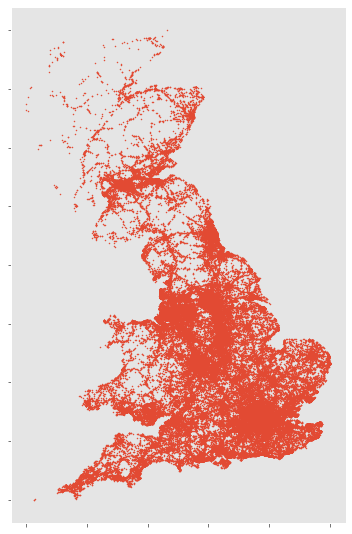

In [57]:
fig, ax = plt.subplots(figsize= (6,9.5))

ax.scatter(eastings, northings * 4, s=1, alpha=1)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
None

In [ ]:
df = df.dropna(subset=['Latitude'])

eastings = (df.Location_Easting_OSGR.values - df.Location_Easting_OSGR.values.min())/(df.Location_Easting_OSGR.values.max() - df.Location_Easting_OSGR.values.min())
northings = (df.Location_Northing_OSGR.values - df.Location_Northing_OSGR.values.min())/(df.Location_Northing_OSGR.values.max() - df.Location_Northing_OSGR.values.min())

fig, ax = plt.subplots(figsize= (8,15))

ax.scatter(eastings, northings * 4, s=1, alpha=.3)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
None


In [58]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'CP', 'Traffic'],
      dtype='object')

In [182]:
traffic.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting',
       'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km',
       'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon', 'TotalCasualties', 'TotalAccidents', 'CasualtiesPerMV',
       'AccidentsPerMV'],
      dtype='object')

In [191]:
df4.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [160]:
traffic['CasualtiesPerMV'] = traffic['TotalCasualties']/traffic['AllMotorVehicles']/traffic['LinkLength_miles'] * 1000000
traffic['AccidentsPerMV'] = traffic['TotalAccidents']/traffic['AllMotorVehicles']/traffic['LinkLength_miles'] * 1000000

In [157]:
casualties = dict(df.groupby(['CP'])['Number_of_Casualties'].agg('sum'))
accidents = dict(df.groupby(['CP'])['Number_of_Casualties'].agg('count'))

In [158]:
df['TotalCasualtiesPerCP'] = df['CP'].map(casualties)
df['TotalAccidentsPerCP'] = df['CP'].map(accidents)

In [159]:
traffic['TotalCasualties'] = traffic['CP'].map(casualties)
traffic['TotalAccidents'] = traffic['CP'].map(accidents)

In [185]:
traffic1 = traffic[traffic['CasualtiesPerMV'] < 20000]
traffic1 = traffic1[traffic1['AADFYear'] == 2005]

eastings = (traffic1.Easting.values - traffic1.Easting.values.min())/(traffic1.Easting.values.max() - traffic1.Easting.values.min())
northings = (traffic1.Northing.values - traffic1.Northing.values.min())/(traffic1.Northing.values.max() - traffic1.Northing.values.min())

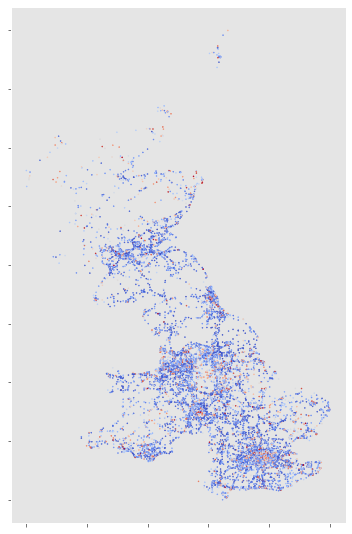

In [186]:
fig, ax = plt.subplots(figsize= (6,9.5))

ax.scatter(eastings, northings * 4, c=traffic1['CasualtiesPerMV'].values/traffic1['CasualtiesPerMV'].max(), s=1, cmap=plt.cm.coolwarm, alpha=1) 
#c=traffic1['CasualtiesPerMV'].values/traffic1['CasualtiesPerMV'].max(),
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
None

In [84]:
traffic = traffic.dropna(subset=['TotalCasualties'])

In [171]:
traffic = traffic[traffic['AllMotorVehicles'] > 0]

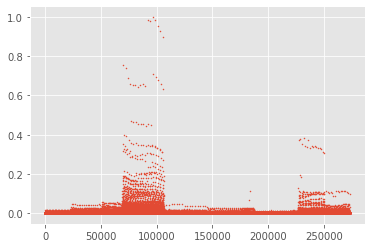

In [112]:
plt.scatter(list(range(len(traffic))),traffic['CasualtiesPerMV'].values/traffic['CasualtiesPerMV'].max(),s=1)

In [119]:
np.mean(traffic['CasualtiesPerMV'].values/traffic['CasualtiesPerMV'].max())

0.0024852080075058493

In [125]:
len(traffic)

273052

In [131]:
len(traffic[traffic['CasualtiesPerMV'] > .005]) / len(traffic)

0.5332500769084277

In [153]:
traffic = pd.read_csv("data/ukTrafficAADF.csv")

In [177]:
traffic2 = pd.read_csv("data/dft_aadf_region_id_1.csv")

In [187]:
traffic2.year.value_counts()
traffic2.head()

,count_point_id,year,region_id,local_authority_id,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_4_or_more_rigid_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,951884,2018,1,71,U,minor,NaN,NaN,248222,131285,...,0,43,3,0,0,0,0,0,3,289
1,951879,2018,1,144,U,minor,NaN,NaN,363128,176155,...,0,31,0,0,0,0,0,0,0,296
2,951878,2018,1,200,U,minor,NaN,NaN,401855,97882,...,51,222,3,3,0,1,0,0,6,2019
3,947725,2018,1,68,U,minor,NaN,NaN,387636,151120,...,21,98,3,1,0,0,0,0,4,838
4,947721,2018,1,68,U,minor,NaN,NaN,392772,173632,...,2,72,6,2,0,0,0,0,8,915


In [180]:
traffic.head()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon,TotalCasualties,TotalAccidents,CasualtiesPerMV,AccidentsPerMV
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,4715,2149,15170,111146,53.398531,-1.309655,104.0,70.0,396.485673,266.865357
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1494,921,4895,65939,53.760869,-1.513814,119.0,79.0,1529.405324,1015.319500
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,3695,2000,8888,40229,53.563523,-0.998970,54.0,37.0,332.256249,227.657059
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,5902,3438,15109,85759,53.645893,-1.940967,192.0,109.0,600.223077,340.751642
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,6669,3743,17436,98487,53.731551,-1.607374,166.0,127.0,554.441329,424.181017


In [188]:
traffic2.columns

Index(['count_point_id', 'year', 'region_id', 'local_authority_id',
       'road_name', 'road_type', 'start_junction_road_name',
       'end_junction_road_name', 'easting', 'northing', 'latitude',
       'longitude', 'link_length_km', 'link_length_miles', 'estimation_method',
       'estimation_method_detailed', 'pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
       'all_motor_vehicles'],
      dtype='object')

In [189]:
traffic.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting',
       'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km',
       'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon', 'TotalCasualties', 'TotalAccidents', 'CasualtiesPerMV',
       'AccidentsPerMV'],
      dtype='object')